<a href="https://colab.research.google.com/github/jefersonfreittas1/Python-Tutorial/blob/main/fun%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método da bissecção**

In [ ]:
import math

# Parâmetros
a_vdw = 17.85  # Exemplo de constante a para van der Waals (ajustada)
b_vdw = 0.13   # Exemplo de constante b para van der Waals (ajustada)
R = 8.3144     # Constante dos gases em L.kPa/K.mol
T = 333.15     # Temperatura em K (60°C)
P = 500        # Pressão em kPa

# Método de Newton-Raphson
V_m = 5.0  # Chute inicial próximo ao valor esperado

for _ in range(100):
    # Equação de Van der Waals
    f_vdw = P - (R * T) / (V_m - b_vdw) + a_vdw / V_m**2

    # Derivada da equação de Van der Waals
    df_vdw = (R * T) / (V_m - b_vdw)**2 - 2 * a_vdw / V_m**3

    # Atualizar valor de V_m usando Newton-Raphson
    V_m_new = V_m - f_vdw / df_vdw

    # Verificar critério de convergência
    if abs(V_m_new - V_m) < 1e-6:
        V_m = V_m_new
        break

    V_m = V_m_new

print("Volume molar (van der Waals): {:.4f} L/mol".format(V_m))


Volume molar (van der Waals): 5.6637 L/mol


In [ ]:
from sympy import symbols, Eq, solve

# Definir variáveis
Vm = symbols('Vm')
R = 8.3144  # L.kPa/K.mol
T = 333.15  # K
P = 500  # kPa
a = 1390.88  # L^2.kPa/mol^2
b = 0.1166  # L/mol

# Equação de Van der Waals
vdw_eq = Eq(P, (R * T) / (Vm - b) - a / Vm**2)

# Resolver a equação para Vm
volume_molar_vdw = solve(vdw_eq, Vm)

volume_molar_vdw


[0.181285233284894 - 0.e-22*I,
 0.349030051876515 + 0.e-22*I,
 5.12616943483859 - 0.e-22*I]

In [ ]:
from sympy import symbols, Eq, solve
#Equação de van der walls
R = 8.314
T = 333
P = 500
Tc = 425.2
Pc = 3789
# Equações
a = (27/64) * ((R*Tc)**2)/Pc
print(f"valor de a = {a}")
b = (R*Tc)/(8*Pc)
print(f"Valor de b = {b}")
#Variável volume molar
Vm = symbols("Vm")
#EQ Van der Waals
EQ_Van = Eq(P,(R*T)/(Vm-b) - a/ Vm**2)
Vol_M = solve(EQ_Van,Vm)
print(f"O volume molar é {Vol_M}")

valor de a = 1391.4440144808311
Valor de b = 0.11662420163631565
O volume molar é [0.181170414875552 + 0.e-22*I, 0.349689206138856 + 0.e-20*I, 5.12288858062191 - 0.e-22*I]


In [ ]:
#gás ideal
R = 8.314
T = 333.15
P = 500
Vm = R*T/P
print(f"O volume molar é: {Vm}")

O volume molar é: 5.5396182


In [ ]:
import math
a = 1390
b = 0.1166
e = 0.1
#Definindo a função
def f(x):
  return x**2-5


  #Teorema de bolzano
if f(a)*f(b)<0:
  while (math.fabs (b-a)/2 >e):
    xi = (a+b)/2
    if f(xi) ==0:
      print(f"A raiz é{xi}")
      break
    else:
      if f(a)*f(xi)<0:
        b = xi
      else:
        a = xi
    print(f"o valor da raiz é {xi}")
else:
  print("Não existe raiz")


o valor da raiz é 695.0583
o valor da raiz é 347.58745
o valor da raiz é 173.852025
o valor da raiz é 86.9843125
o valor da raiz é 43.55045625
o valor da raiz é 21.833528125
o valor da raiz é 10.9750640625
o valor da raiz é 5.54583203125
o valor da raiz é 2.831216015625
o valor da raiz é 1.4739080078125
o valor da raiz é 2.15256201171875
o valor da raiz é 2.4918890136718748
o valor da raiz é 2.3222255126953124


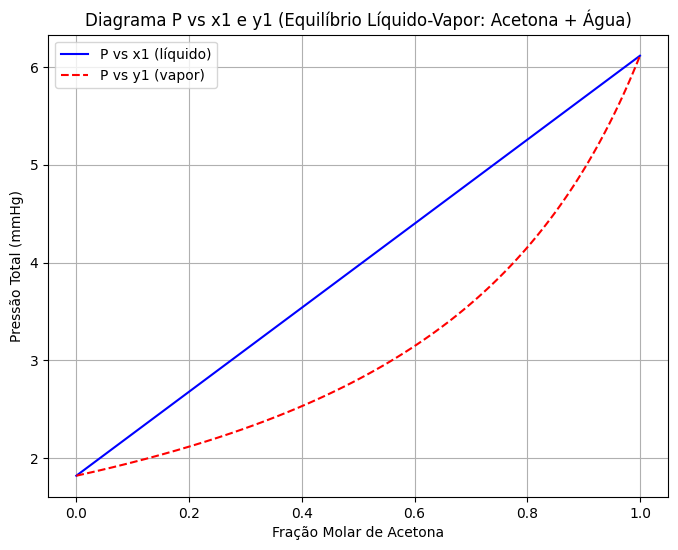

(6.115855827845207, 1.8202401046341687)

In [ ]:
# Dados para acetona e água a partir da equação de Antoine
A_acetona, B_acetona, C_acetona = 4.42448, 1312.253, -32.445
A_agua, B_agua, C_agua = 3.55959, 643.748, -198.043
T = 393.15  # Temperatura em Kelvin

# Função para calcular pressão de vapor usando a equação de Antoine
def calc_Psat(A, B, C, T):
    return 10 ** (A - B / (T + C))

# Calculando as pressões de vapor saturadas
Psat_acetona = calc_Psat(A_acetona, B_acetona, C_acetona, T)
Psat_agua = calc_Psat(A_agua, B_agua, C_agua, T)

# Faixa de frações molares da acetona na fase líquida (x1 varia de 0 a 1)
x1 = np.linspace(0, 1, 100)
x2 = 1 - x1  # Fração molar de água (complemento de x1)

# Calculando as pressões parciais pela Lei de Raoult
P_acetona = x1 * Psat_acetona
P_agua = x2 * Psat_agua

# Pressão total da mistura
P_total = P_acetona + P_agua

# Fração molar da acetona na fase vapor
y1 = P_acetona / P_total

# Plotando o gráfico P vs x1 e y1
plt.figure(figsize=(8, 6))
plt.plot(x1, P_total, label="P vs x1 (líquido)", color='blue')
plt.plot(y1, P_total, label="P vs y1 (vapor)", color='red', linestyle='--')
plt.xlabel("Fração Molar de Acetona")
plt.ylabel("Pressão Total (mmHg)")
plt.title("Diagrama P vs x1 e y1 (Equilíbrio Líquido-Vapor: Acetona + Água)")
plt.legend()
plt.grid(True)
plt.show()

# Retornar as pressões saturadas calculadas
Psat_acetona, Psat_agua


In [ ]:
#lei de raoult equilíbrio L-V
import numpy as np
import matplotlib.pyplot as plt
#Dados
T = 393.15
a = np.array([4,42448,3.55959])
b = np.array([1312.253,643.748])
c = np.array([-32.445,198.043])
NC = 2
xx = (0,1.01,0.01) #fração molar
for i in range(NC):
  Psat = a[i]-b[i]/(T+c[i]) #pressão de sat. mmHg
  P = (10**Psat)*0.00133 #bar
#Cálculo Equilíbrio L-V
for i in range(xx):
  x = np.array([xx[i], 1-xx[i]]) #Cálculo da fração na fase líquida
  #------------#
  soma = 0
  for k in range(NC):
    soma = soma + x[k]*Psat[k]
  P[i] = soma

  for j in range(NC):
    y[i,j]=x[j]*Psat[j]/P[i] #Cálculo da fração na fase de vapor

plt.plot(xx,P,label='Fração molar na fase líquida, $x_1$')
plt.plot(y[:,0],P,label='Fração molar na fase vapor, $y_1$')
plt.legend(loc='best')
plt.xlabel('$x_1$,$y_1$')
plt.ylabel('Pressão [bar]')
plt.grid(color='k',linestyle=':')


<ipython-input-16-5c1e61446253>:13: RuntimeWarning: overflow encountered in scalar power
  P = (10**Psat)*0.00133 #bar


TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
def contador(*núm):
  s=
  print("")


contador(1,2,3,15,7,74)
contador(1,2)
contador(1,2,4)
contador(2,3,4)

(1, 2, 3, 15, 7, 74)
(1, 2)
(1, 2, 4)
(2, 3, 4)


In [ ]:
def soma(a,b): #a,b são parâmetros
  s = a+b
  print(f"A soma entre {a} e {b} é = {s}")
#deixar 2 linhas
#deixar 2 linhas
soma(2,0)
soma(7,3)
soma(2,5)
soma(9,3)
soma(2,14)

A soma entre 2 e 0 é = 2
A soma entre 7 e 3 é = 10
A soma entre 2 e 5 é = 7
A soma entre 9 e 3 é = 12
A soma entre 2 e 14 é = 16


In [ ]:
def mensagem(msg): #é um parâmetro com uma rotina
  print('------------')
  print(msg)
  print('------------')
mensagem("Olá")


------------
Olá
------------


In [ ]:
def lin():
  print("----")
lin()
print("Olá, Jeferson!")
lin()
print("Olá, Totoro!")

----
Olá, Jeferson!
----
Olá, Totoro!
